In [1]:
# Time-Series Exploratory Data Analysis (EDA)
"""
This notebook focuses on:
- Understanding sales trends and seasonality
- Analyzing demand patterns over time
- Studying holiday and external factor impact
- Identifying volatility and store-level variations

"""

print("Time-Series EDA Notebook Loaded Successfully.")


Time-Series EDA Notebook Loaded Successfully.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)


In [3]:
data_path = "C:\\Multivariate_TimeSeries_Forecasting_CP2\\data\\raw\\processed\\walmart_merged_cleaned.csv"
df = pd.read_csv(data_path, parse_dates=["Date"], index_col="Date")

df.shape


(421570, 17)

In [4]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     421570 non-null  float64
 7   MarkDown2     421570 non-null  float64
 8   MarkDown3     421570 non-null  float64
 9   MarkDown4     421570 non-null  float64
 10  MarkDown5     421570 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  Type_x        421570 non-null  object 
 14  Size_x        421570 non-null  int64  
 15  Type_y        421570 non-null  object 
 16  Size_y        421570 non-null  int64  
dtypes: bool(1), float64(10), int64(4

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size_x,Size_y
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,219622.000000


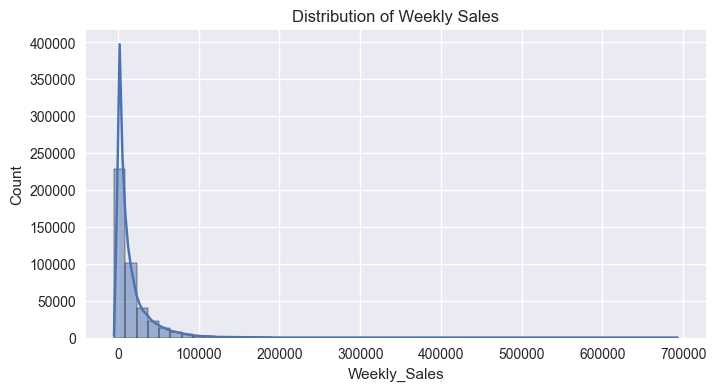

In [5]:
# Target Variable Distribution (Weekly Sales)
plt.figure(figsize=(8,4))
sns.histplot(df["Weekly_Sales"], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.show()


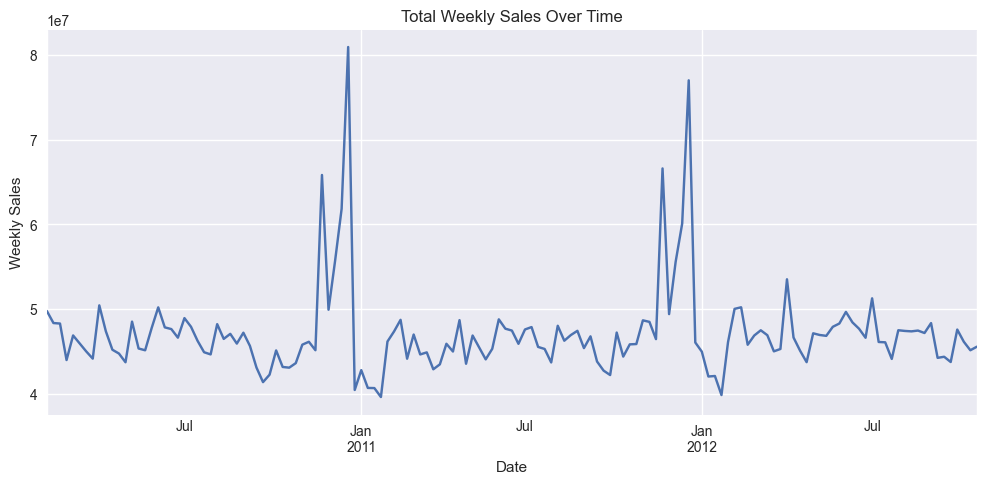

In [6]:
# Weekly/Aggregate Sales Over Time (Global Trend)
weekly_sales = df.groupby("Date")["Weekly_Sales"].sum()

plt.figure(figsize=(12,5))
weekly_sales.plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


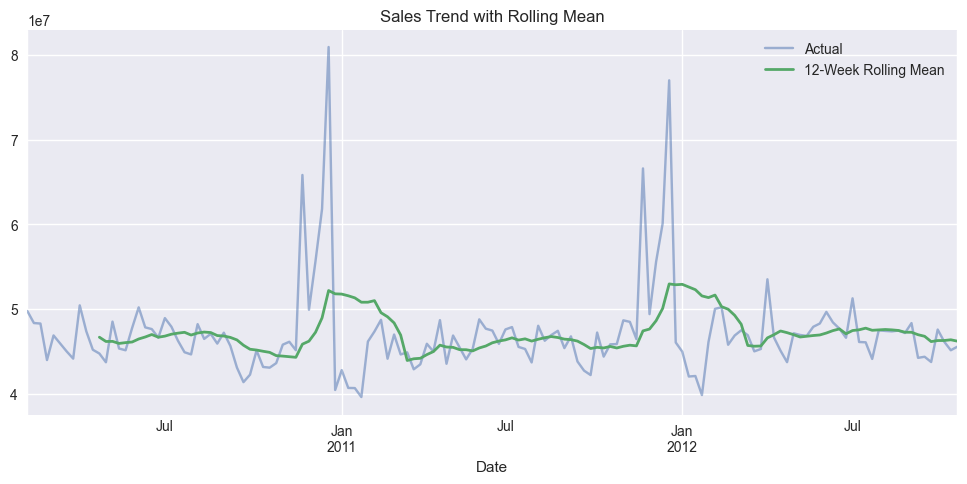

In [7]:
# Sales Trend with Rolling Mean
rolling_sales = weekly_sales.rolling(window=12).mean()

plt.figure(figsize=(12,5))
weekly_sales.plot(label="Actual", alpha=0.5)
rolling_sales.plot(label="12-Week Rolling Mean", linewidth=2)
plt.legend()
plt.title("Sales Trend with Rolling Mean")
plt.show()


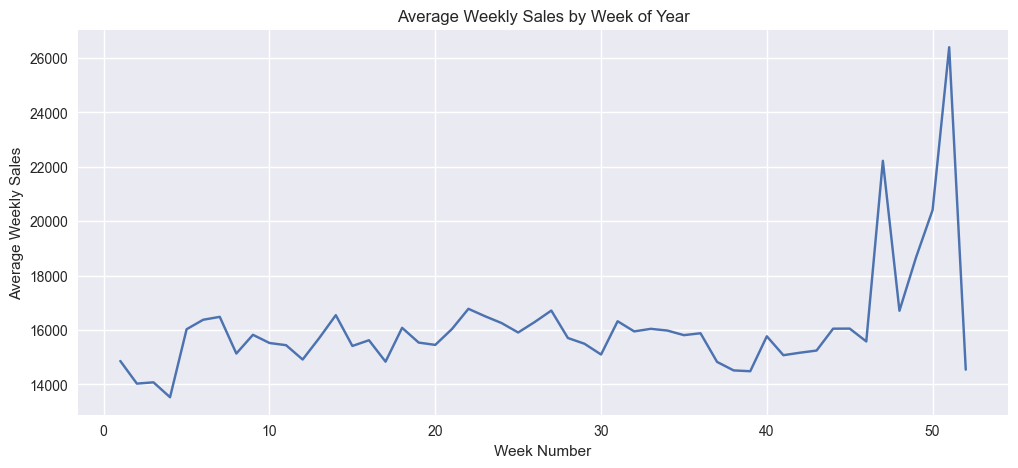

In [9]:
# Seasonality Analysis (Average Weekly Sales by Week of Year) - Seasonality Analysis (Yearly Pattern)
df["Year"] = df.index.year
df["Week"] = df.index.isocalendar().week

seasonal_pattern = df.groupby("Week")["Weekly_Sales"].mean()

plt.figure(figsize=(12,5))
seasonal_pattern.plot()
plt.title("Average Weekly Sales by Week of Year")
plt.xlabel("Week Number")
plt.ylabel("Average Weekly Sales")
plt.show()


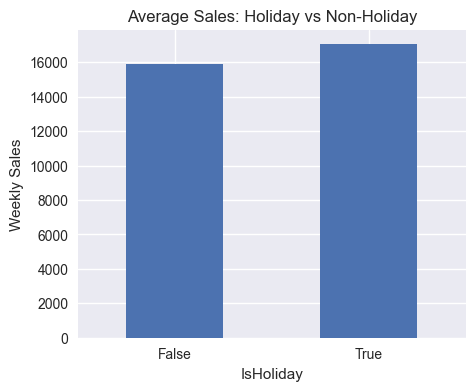

In [10]:
# Holiday Impact on Sales - Holiday vs Non-Holiday Sales
holiday_sales = df.groupby("IsHoliday")["Weekly_Sales"].mean()

holiday_sales.plot(kind="bar", figsize=(5,4))
plt.title("Average Sales: Holiday vs Non-Holiday")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=0)
plt.show()


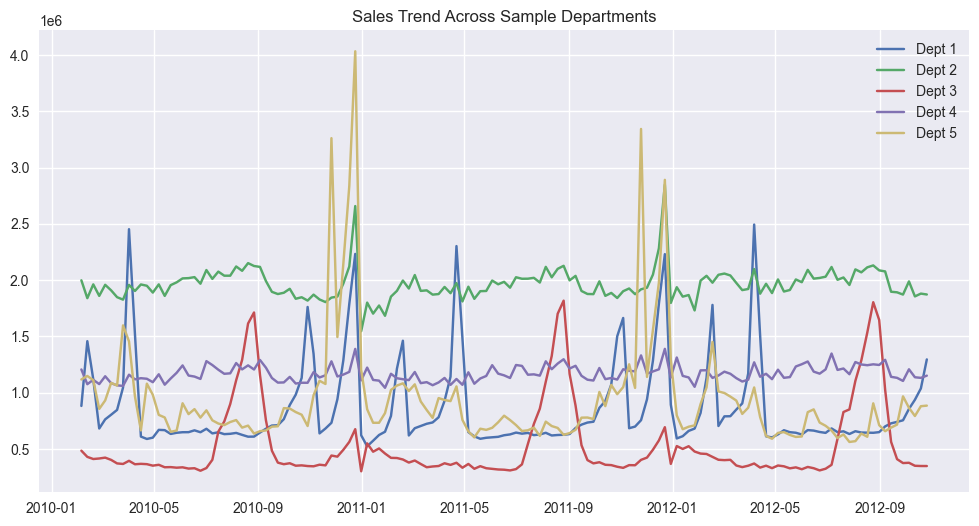

In [11]:
# Store-Level Sales Variability - Sample Departments
sample_depts = df["Dept"].unique()[:5]

plt.figure(figsize=(12,6))
for dept in sample_depts:
    dept_data = df[df["Dept"] == dept].groupby("Date")["Weekly_Sales"].sum()
    plt.plot(dept_data, label=f"Dept {dept}")

plt.legend()
plt.title("Sales Trend Across Sample Departments")
plt.show()


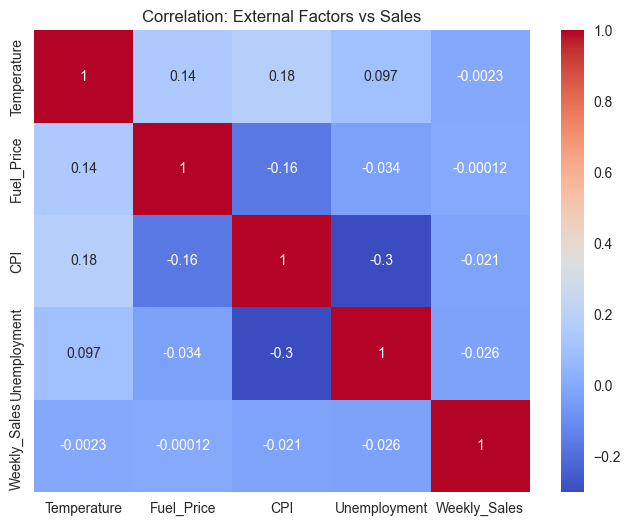

In [12]:
# Correlation Analysis with External Factors
external_features = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]

corr = df[external_features + ["Weekly_Sales"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation: External Factors vs Sales")
plt.show()


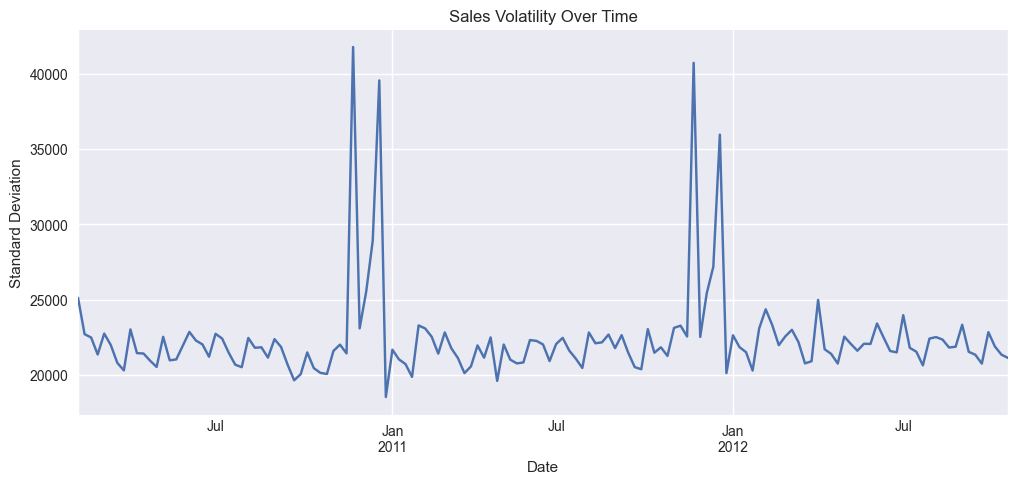

In [13]:
# Sales Volatility Over Time
weekly_std = df.groupby("Date")["Weekly_Sales"].std()

plt.figure(figsize=(12,5))
weekly_std.plot()
plt.title("Sales Volatility Over Time")
plt.ylabel("Standard Deviation")
plt.show()


### Key Insights from EDA

- Sales exhibit strong seasonal and yearly patterns.
- Holiday weeks consistently show higher demand.
- Store types and departments display varying sales behaviors.
- External factors have moderate influence when combined.
- Sales volatility indicates potential inventory risk periods.

These insights justify the use of multivariate time-series forecasting
and deep learning sequence models.


In [15]:
# Save Figures
# Example: Save one key figure
plt.figure(figsize=(12,5))
weekly_sales.plot()
plt.title("Total Weekly Sales Over Time")
plt.savefig("../reports/figures/eda/weekly_sales_trend.png")
plt.close()
